Visualizing Verbatim test.json


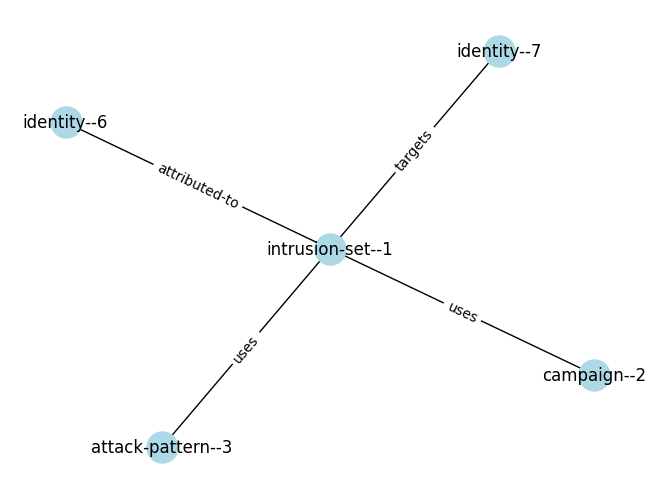

In [3]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

def load_json(file_path):
    """Load JSON data from a file."""
    with open(file_path, 'r') as file:
        return json.load(file)

def create_graph_from_json(json_data):
    """Create a networkx graph from custom JSON data that includes types and relationships."""
    G = nx.Graph()
    id_attr_map = {}
    
    # First pass to create nodes
    for item in json_data:
        if item['type'] != 'relationship':
            G.add_node(item['id'], **item)
            id_attr_map[item['id']] = item
    
    # Second pass to create edges based on relationships
    for item in json_data:
        if item['type'] == 'relationship':
            if item['source_ref'] in id_attr_map and item['target_ref'] in id_attr_map:
                G.add_edge(item['source_ref'], item['target_ref'], **item)

    return G

def visualize_graph(G):
    """Visualize a networkx graph."""
    pos = nx.spring_layout(G, seed=42)  # Use a seed for reproducible layout
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)
    edge_labels = nx.get_edge_attributes(G, 'relationship_type')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

def main(directory):
    """Process all JSON files in the specified directory and visualize the graphs."""
    json_files = [f for f in os.listdir(directory) if f.endswith('.json')]
    
    for json_file in json_files:
        full_path = os.path.join(directory, json_file)
        json_data = load_json(full_path)
        graph = create_graph_from_json(json_data)
        print(f"Visualizing {json_file}")
        visualize_graph(graph)

if __name__ == "__main__":
    dir_path = input("Enter the directory path containing JSON files: ")
    main(dir_path)
